## L1/L2 and dropout. Also illustrates `tf.data.Datasets`



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras import regularizers

from sklearn.datasets import load_breast_cancer, load_digits

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input, Dropout, Normalization, Conv2D, Conv3D, MaxPooling2D, Flatten

### Regularizing with L1, L2

In [2]:
cover = pd.read_csv("/Users/blove/PycharmProjects/deepLearning/Data/covtype.csv")
cover = cover.sample(50000)
cover["Cover_Type"] = cover["Cover_Type"].astype("category") 
X = cover.drop(columns='Cover_Type')
y = cover['Cover_Type']

from sklearn.preprocessing import LabelEncoder 

y = LabelEncoder().fit_transform(y)


Xtrain, Xval, ytrain, yval = train_test_split(
    X, y, random_state=42, stratify= y
)



In [6]:
normalizer = Normalization()
normalizer.adapt(Xtrain)

# Build with add()
model = Sequential()
model.add(normalizer)
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    Xtrain, ytrain,
    validation_data=(Xval, yval),
    epochs=30
)


Epoch 1/30
1172/1172 [==============================] - 1s 688us/step - loss: 0.7256 - accuracy: 0.7029 - val_loss: 0.6369 - val_accuracy: 0.7305
Epoch 2/30
1172/1172 [==============================] - 1s 705us/step - loss: 0.6142 - accuracy: 0.7410 - val_loss: 0.6025 - val_accuracy: 0.7444
Epoch 3/30
1172/1172 [==============================] - 1s 620us/step - loss: 0.5889 - accuracy: 0.7499 - val_loss: 0.5925 - val_accuracy: 0.7500
Epoch 4/30
1172/1172 [==============================] - 1s 655us/step - loss: 0.5715 - accuracy: 0.7568 - val_loss: 0.5710 - val_accuracy: 0.7566
Epoch 5/30
1172/1172 [==============================] - 1s 649us/step - loss: 0.5575 - accuracy: 0.7606 - val_loss: 0.5655 - val_accuracy: 0.7518
Epoch 6/30
1172/1172 [==============================] - 1s 677us/step - loss: 0.5466 - accuracy: 0.7646 - val_loss: 0.5584 - val_accuracy: 0.7538
Epoch 7/30
1172/1172 [==============================] - 1s 666us/step - loss: 0.5391 - accuracy: 0.7695 - val_loss: 0.5581 -

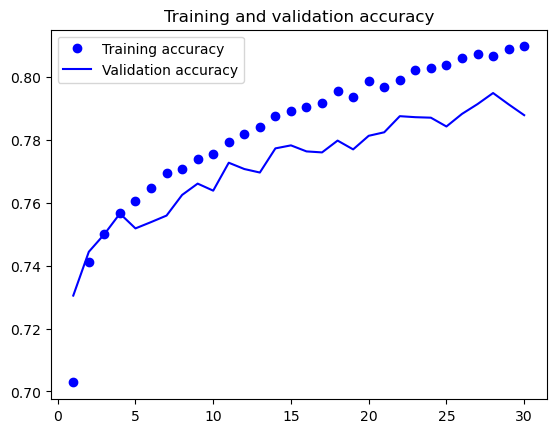

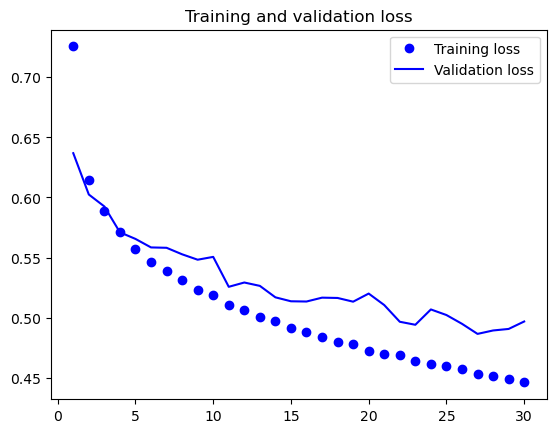

In [7]:

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Add regularization

In [8]:

normalizer = Normalization()
normalizer.adapt(Xtrain)

model = Sequential()
model.add(normalizer)
model.add(Dense(128, 
                activation='relu', 
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(7, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    Xtrain, ytrain,
    validation_data=(Xval, yval),
    epochs=30
)

Epoch 1/30
1172/1172 [==============================] - 1s 688us/step - loss: 0.9410 - accuracy: 0.6983 - val_loss: 0.7343 - val_accuracy: 0.7246
Epoch 2/30
1172/1172 [==============================] - 1s 625us/step - loss: 0.7078 - accuracy: 0.7245 - val_loss: 0.6897 - val_accuracy: 0.7354
Epoch 3/30
1172/1172 [==============================] - 1s 620us/step - loss: 0.6822 - accuracy: 0.7300 - val_loss: 0.6690 - val_accuracy: 0.7394
Epoch 4/30
1172/1172 [==============================] - 1s 693us/step - loss: 0.6684 - accuracy: 0.7366 - val_loss: 0.6767 - val_accuracy: 0.7271
Epoch 5/30
1172/1172 [==============================] - 1s 640us/step - loss: 0.6604 - accuracy: 0.7391 - val_loss: 0.6717 - val_accuracy: 0.7296
Epoch 6/30
1172/1172 [==============================] - 1s 692us/step - loss: 0.6547 - accuracy: 0.7395 - val_loss: 0.6515 - val_accuracy: 0.7451
Epoch 7/30
1172/1172 [==============================] - 1s 639us/step - loss: 0.6484 - accuracy: 0.7423 - val_loss: 0.6447 -

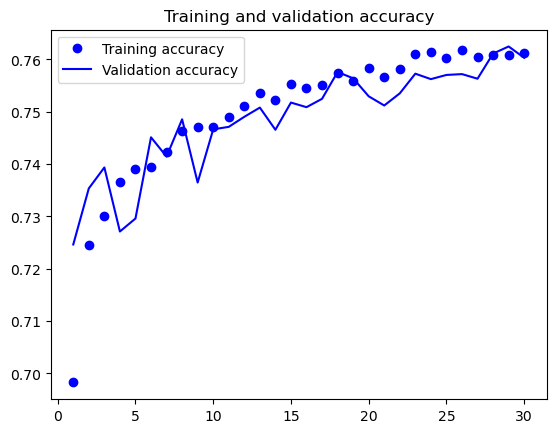

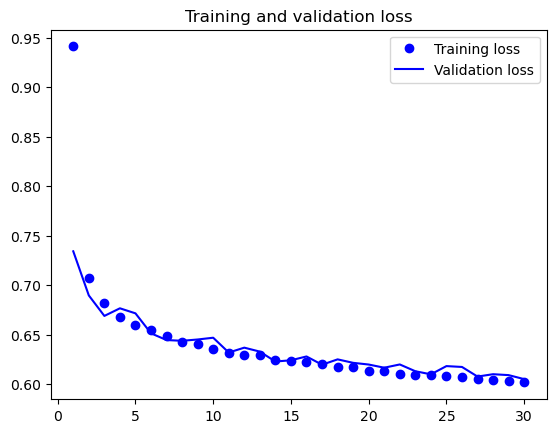

In [9]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Same thing with functional API

2025-10-02 06:05:56.399680: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30
1172/1172 [==============================] - 1s 686us/step - loss: 0.7279 - accuracy: 0.6995 - val_loss: 0.6270 - val_accuracy: 0.7357
Epoch 2/30
1172/1172 [==============================] - 1s 611us/step - loss: 0.6141 - accuracy: 0.7386 - val_loss: 0.5954 - val_accuracy: 0.7458
Epoch 3/30
1172/1172 [==============================] - 1s 660us/step - loss: 0.5856 - accuracy: 0.7483 - val_loss: 0.5868 - val_accuracy: 0.7470
Epoch 4/30
1172/1172 [==============================] - 1s 613us/step - loss: 0.5709 - accuracy: 0.7557 - val_loss: 0.5677 - val_accuracy: 0.7598
Epoch 5/30
1172/1172 [==============================] - 1s 651us/step - loss: 0.5576 - accuracy: 0.7622 - val_loss: 0.5606 - val_accuracy: 0.7604
Epoch 6/30
1172/1172 [==============================] - 1s 611us/step - loss: 0.5457 - accuracy: 0.7669 - val_loss: 0.5559 - val_accuracy: 0.7637
Epoch 7/30
1172/1172 [==============================] - 1s 609us/step - loss: 0.5370 - accuracy: 0.7690 - val_loss: 0.5433 -

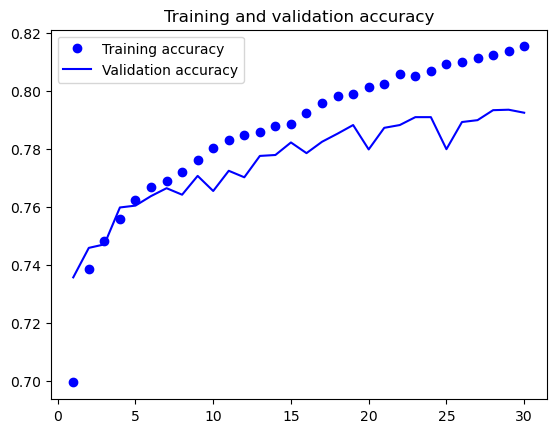

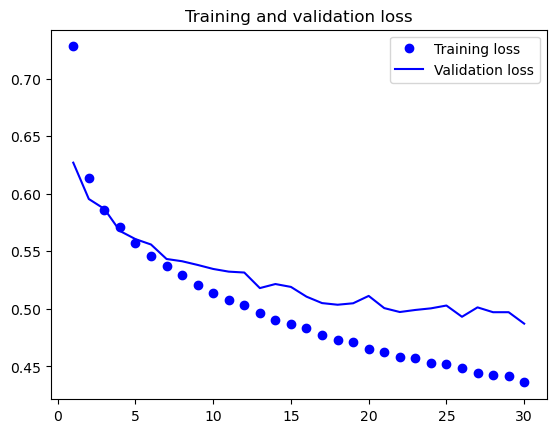

In [ ]:

normalizer = Normalization()
normalizer.adapt(Xtrain)

inputs = Input(shape= (Xtrain.shape[1], ))
x = normalizer(inputs)

x = Dense(128, activation='relu')(x)

outputs = Dense(7, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, validation_data=[Xval, yval], epochs=30)

### `cifar10` data. Load the data. See the documentation. 

In [35]:
import tensorflow_datasets as tfds
ds = tfds.load('cifar10', split='train[:20%]', shuffle_files=True, download=False)
assert isinstance(ds, tf.data.Dataset)


In [6]:

dss = ds.take(1)  # Only take a single example

for example in dss:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)

['id', 'image', 'label']
(32, 32, 3) tf.Tensor(7, shape=(), dtype=int64)


2024-07-12 13:51:37.923110: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-12 13:51:37.951958: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


If you look at the documentation for `cifar10` you see the feature structure as

```
FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
```
We can also check

In [65]:
ds.element_spec

{'id': TensorSpec(shape=(), dtype=tf.string, name=None),
 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None),
 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}

So we strip off the index

In [36]:

dss = ds.map(lambda element: (element['image'], element['label']))

dss = dss.batch(32)

We can view the first five labels of the original ds. The `.numpy()` just prints a number. You can compare without it.

In [92]:
for example in ds.take(5):
  print(example["label"].numpy())

7
8
4
4
6


But now, after the `map` tranformation, dss is now a tuple rather than a dictionary, so the instead of above we would do something like below. Keras is fine with dictionaries, tuples, numpy arrays.

In [86]:
for example in dss.take(5):
  print(example[1].numpy())

7
8
4
4
6


Train test splits

In [37]:
dss = ds.map(lambda element: (element['image'], element['label']))

train, val = keras.utils.split_dataset(dss, left_size=0.8, shuffle = True)

train = train.batch(32)
val = val.batch(32)

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [48]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer_ = keras.optimizers.Adam(learning_rate=lr_schedule)

In [15]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    train,
    validation_data=val,
    epochs=20,
)

Epoch 1/20
250/250 [==============================] - 2s 9ms/step - loss: 1.8979 - accuracy: 0.3187 - val_loss: 1.6965 - val_accuracy: 0.4190
Epoch 2/20
250/250 [==============================] - 2s 8ms/step - loss: 1.5663 - accuracy: 0.4518 - val_loss: 1.5447 - val_accuracy: 0.4735
Epoch 3/20
250/250 [==============================] - 2s 8ms/step - loss: 1.4167 - accuracy: 0.5038 - val_loss: 1.4643 - val_accuracy: 0.4865
Epoch 4/20
250/250 [==============================] - 2s 8ms/step - loss: 1.3218 - accuracy: 0.5428 - val_loss: 1.4220 - val_accuracy: 0.5005
Epoch 5/20
250/250 [==============================] - 2s 9ms/step - loss: 1.2461 - accuracy: 0.5751 - val_loss: 1.4019 - val_accuracy: 0.5070
Epoch 6/20
250/250 [==============================] - 2s 8ms/step - loss: 1.1809 - accuracy: 0.5934 - val_loss: 1.3823 - val_accuracy: 0.5150
Epoch 7/20
250/250 [==============================] - 2s 8ms/step - loss: 1.1285 - accuracy: 0.6165 - val_loss: 1.3616 - val_accuracy: 0.5300
Epoch 

The model overfits

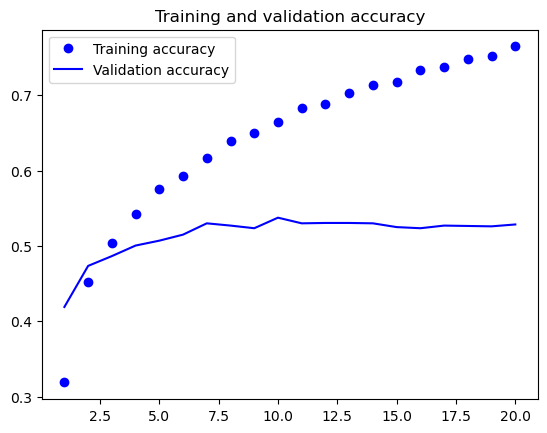

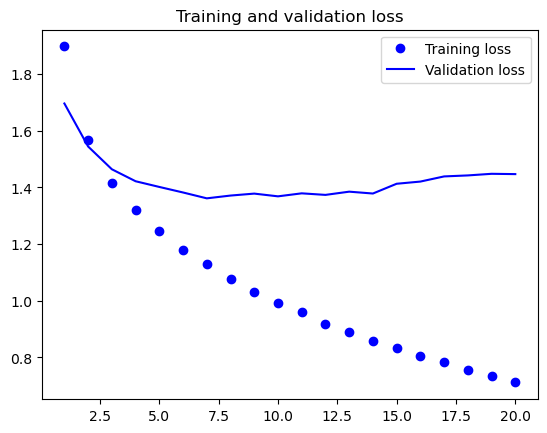

In [16]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Droput 

Now try dropout. With 50% dropout we get no overfitting. But the accuracy has decreased. But the complete absence of overfitting indicates that we could go with a more complex model. Or maybe its just too much regularization.

In [41]:

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [42]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    train,
    validation_data=val,
    epochs=20,
)

Epoch 1/20
250/250 [==============================] - 7s 29ms/step - loss: 2.2078 - accuracy: 0.1583 - val_loss: 2.0897 - val_accuracy: 0.1990
Epoch 2/20
250/250 [==============================] - 6s 22ms/step - loss: 1.9792 - accuracy: 0.2467 - val_loss: 1.9051 - val_accuracy: 0.2755
Epoch 3/20
250/250 [==============================] - 5s 22ms/step - loss: 1.8364 - accuracy: 0.3111 - val_loss: 1.7662 - val_accuracy: 0.3365
Epoch 4/20
250/250 [==============================] - 7s 29ms/step - loss: 1.7537 - accuracy: 0.3560 - val_loss: 1.6888 - val_accuracy: 0.3695
Epoch 5/20
250/250 [==============================] - 5s 21ms/step - loss: 1.6960 - accuracy: 0.3708 - val_loss: 1.6554 - val_accuracy: 0.3905
Epoch 6/20
250/250 [==============================] - 6s 22ms/step - loss: 1.6446 - accuracy: 0.3951 - val_loss: 1.5977 - val_accuracy: 0.4205
Epoch 7/20
250/250 [==============================] - 6s 24ms/step - loss: 1.6041 - accuracy: 0.4132 - val_loss: 1.5580 - val_accuracy: 0.4360

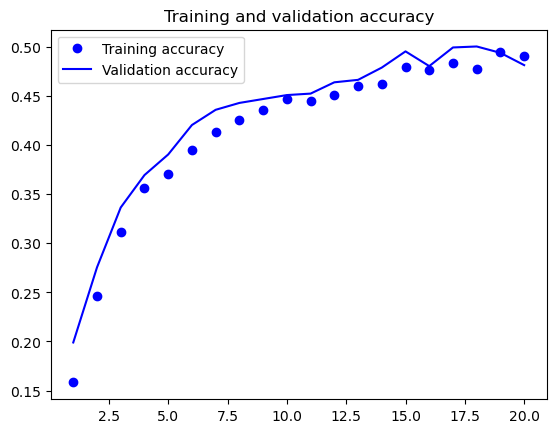

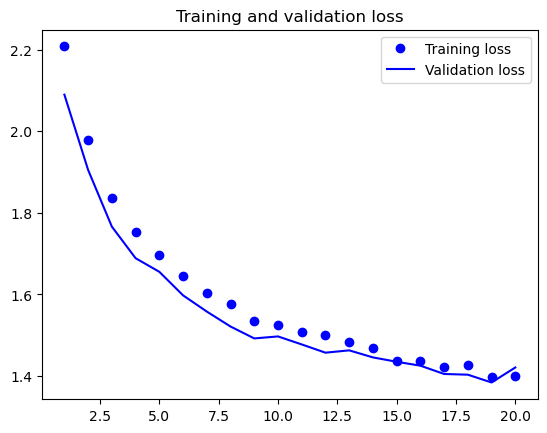

In [43]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


#### Backing off on dropout regularization

We wont increase complexity here, but instead we back off a bit on the regularization. We see now we get a little overfitting but the accuracy has imporoved significantly from the no dropout model. 

Epoch 1/20
250/250 [==============================] - 8s 32ms/step - loss: 2.1751 - accuracy: 0.1650 - val_loss: 2.0171 - val_accuracy: 0.2325
Epoch 2/20
250/250 [==============================] - 7s 29ms/step - loss: 1.8570 - accuracy: 0.3085 - val_loss: 1.7427 - val_accuracy: 0.3600
Epoch 3/20
250/250 [==============================] - 9s 37ms/step - loss: 1.7010 - accuracy: 0.3688 - val_loss: 1.5830 - val_accuracy: 0.4150
Epoch 4/20
250/250 [==============================] - 12s 49ms/step - loss: 1.5866 - accuracy: 0.4187 - val_loss: 1.5507 - val_accuracy: 0.4275
Epoch 5/20
250/250 [==============================] - 12s 46ms/step - loss: 1.5086 - accuracy: 0.4531 - val_loss: 1.4403 - val_accuracy: 0.4620
Epoch 6/20
250/250 [==============================] - 10s 42ms/step - loss: 1.4383 - accuracy: 0.4753 - val_loss: 1.3842 - val_accuracy: 0.4835
Epoch 7/20
250/250 [==============================] - 7s 29ms/step - loss: 1.3913 - accuracy: 0.5000 - val_loss: 1.3517 - val_accuracy: 0.5

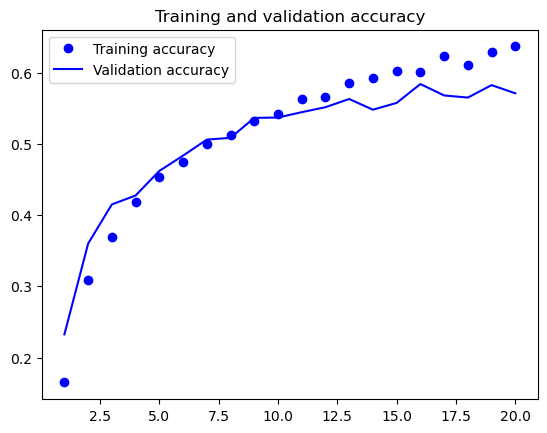

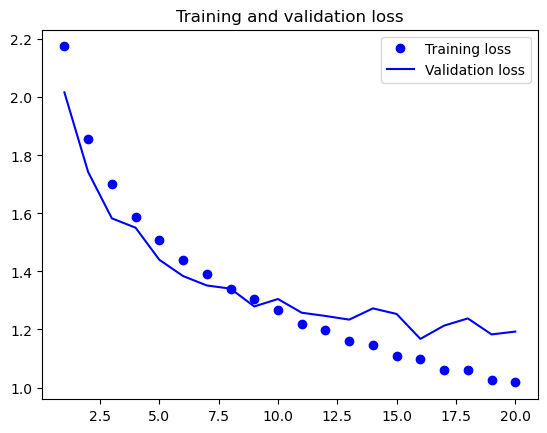

In [44]:

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    train,
    validation_data=val,
    epochs=20,
)

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()